In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot
import tensorflow as tf

In [2]:
import pickle

def load_pickled_data(file, columns):
    """
    Loads pickled training and test data.

    Parameters:
    -----------
        file: file name
        column: column name
    Returns:
    --------
    A tuple of datasets for given column.
    """

    with open(file, mode='rb') as f:
        dataset = pickle.load(f)
    return tuple(map(lambda x: dataset[x], columns))

Kod, który widzisz, jest funkcją w Pythonie, która służy do wczytywania danych z plików pickle. Pliki pickle są używane do serializacji i deserializacji struktury obiektów Pythona. Co to oznacza? Serializacja to proces konwersji obiektu (struktury danych) do formatu, który może być przechowywany (na przykład w pliku lub w pamięci bufora), podczas gdy deserializacja to odwrotny proces.

Funkcja `load_picked_data` przyjmuje dwa argumenty: `file` i `columns`. `file` to nazwa pliku, z którego mają być wczytane dane, a `columns` to kolumny, które mają być wczytane z pliku.

Wewnątrz funkcji, używamy instrukcji `with` do otwarcia pliku. `with` jest używane w Pythonie do uproszczenia zarządzania zasobami, takich jak pliki. W tym przypadku, po zakończeniu bloku kodu `with`, plik zostanie automatycznie zamknięty, nawet jeśli wystąpi błąd podczas przetwarzania danych.

Następnie, używamy funkcji `pickle.load(f)` do wczytania danych z pliku. Wynik jest przypisywany do zmiennej `dataset`.

Na koniec, funkcja zwraca krotkę, która jest wynikiem mapowania kolumn z `dataset` do nowej krotki. `map` jest wbudowaną funkcją w Pythonie, która służy do stosowania funkcji do każdego elementu iterowalnego (takiego jak lista lub krotka). W tym przypadku, używamy `lambda` do stworzenia krótkiej funkcji anonimowej, która zwraca wartość dla danego klucza (kolumny) z `dataset`.

In [3]:
from pandas.io.parsers import read_csv

signnames = read_csv('data/label_names.csv').values[:, 1]
train_dataset_file = 'data/train.pickle'
test_dataset_file = 'data/test.pickle'
# train_balanced_dataset_file = 'traffic_signs-data/train_balanced.p'

X_train, y_train = load_pickled_data(train_dataset_file, ['features', 'labels'])
X_test, y_test = load_pickled_data(test_dataset_file, ['features', 'labels'])

n_train = y_train.shape[0]
n_test = y_test.shape[0]
image_shape = X_train[0].shape
image_size = image_shape[0]
sign_classes, class_indices, class_counts = np.unique(y_train, return_index=True, return_counts=True)
n_classes = class_counts.shape[0]

print('Number of training examples = ', n_train)
print('Number of testing examples = ', n_test)
print('Image data shape = ', image_shape)
print('Number of classes = ', n_classes)

Number of training examples =  34799
Number of testing examples =  12630
Image data shape =  (32, 32, 3)
Number of classes =  43


Kod, który widzisz, jest częścią skryptu Pythona, który wczytuje i analizuje zbiór danych do rozpoznawania znaków drogowych.

Na początku, importujemy funkcję `read_csv` z modułu `pandas.io.parsers`. `read_csv` jest używane do wczytywania danych z plików CSV. Następnie wczytujemy plik 'signnames.csv' i bierzemy tylko drugą kolumnę (indeksowane od 0) z każdego wiersza.

Następnie, definiujemy nazwy plików dla naszych zbiorów danych treningowych i testowych. Te pliki są w formacie pickle, który jest używany do serializacji i deserializacji obiektów Pythona.

Korzystamy z wcześniej zdefiniowanej funkcji `load_picked_data` do wczytania danych treningowych i testowych. Ta funkcja zwraca dwie wartości: `X_train`/`X_test` (cechy) i `y_train`/`y_test` (etykiety).

Następnie, obliczamy kilka statystyk na temat naszych danych. `n_train` i `n_test` to liczba przykładów treningowych i testowych. `image_shape` to kształt pojedynczego obrazu (wymiary), a `image_size` to rozmiar jednego wymiaru obrazu. `sign_classes`, `class_indices` i `class_counts` to unikalne klasy, indeksy i liczby wystąpień tych klas w `y_train`. `n_classes` to liczba unikalnych klas.

Na koniec, drukujemy te statystyki, aby zrozumieć, jakie mamy dane.

Class 0: Speed limit (20km/h)                               180 samples


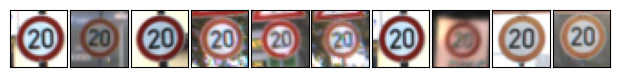

-------------------------------------------------------------------------------------

Class 1: Speed limit (30km/h)                               1980 samples


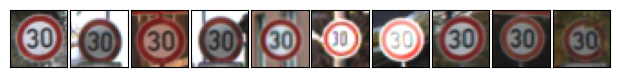

-------------------------------------------------------------------------------------

Class 2: Speed limit (50km/h)                               2010 samples


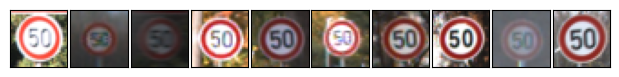

-------------------------------------------------------------------------------------

Class 3: Speed limit (60km/h)                               1260 samples


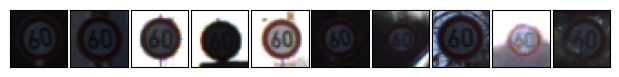

-------------------------------------------------------------------------------------

Class 4: Speed limit (70km/h)                               1770 samples


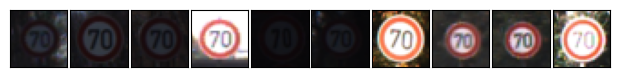

-------------------------------------------------------------------------------------

Class 5: Speed limit (80km/h)                               1650 samples


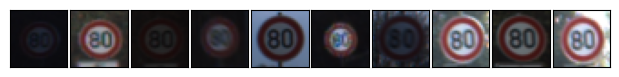

-------------------------------------------------------------------------------------

Class 6: End of speed limit (80km/h)                        360 samples


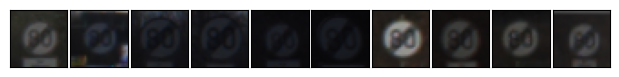

-------------------------------------------------------------------------------------

Class 7: Speed limit (100km/h)                              1290 samples


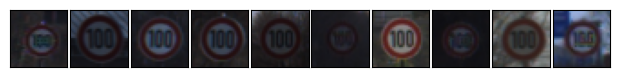

-------------------------------------------------------------------------------------

Class 8: Speed limit (120km/h)                              1260 samples


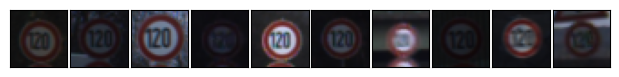

-------------------------------------------------------------------------------------

Class 9: No passing                                         1320 samples


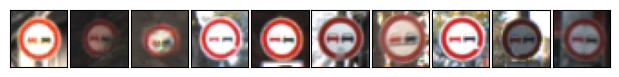

-------------------------------------------------------------------------------------

Class 10: No passing for vehicles over 3.5 metric tons       1800 samples


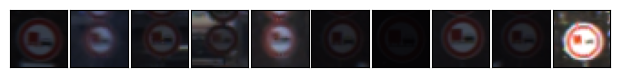

-------------------------------------------------------------------------------------

Class 11: Right-of-way at the next intersection              1170 samples


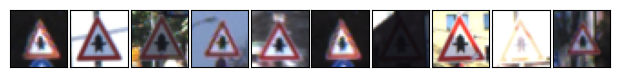

-------------------------------------------------------------------------------------

Class 12: Priority road                                      1890 samples


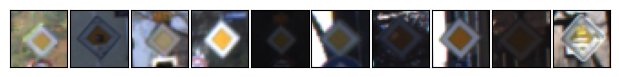

-------------------------------------------------------------------------------------

Class 13: Yield                                              1920 samples


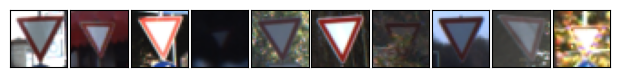

-------------------------------------------------------------------------------------

Class 14: Stop                                               690 samples


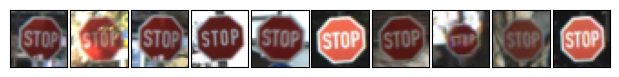

-------------------------------------------------------------------------------------

Class 15: No vehicles                                        540 samples


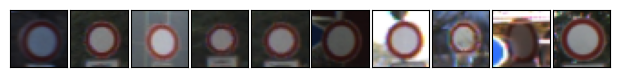

-------------------------------------------------------------------------------------

Class 16: Vehicles over 3.5 metric tons prohibited           360 samples


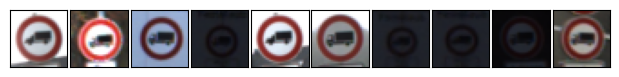

-------------------------------------------------------------------------------------

Class 17: No entry                                           990 samples


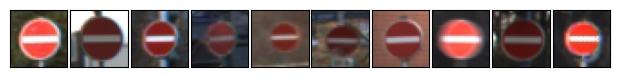

-------------------------------------------------------------------------------------

Class 18: General caution                                    1080 samples


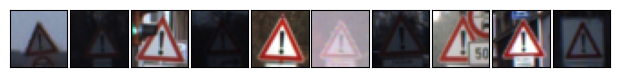

-------------------------------------------------------------------------------------

Class 19: Dangerous curve to the left                        180 samples


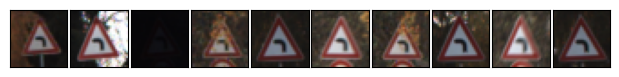

-------------------------------------------------------------------------------------

Class 20: Dangerous curve to the right                       300 samples


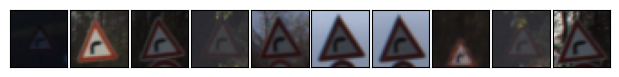

-------------------------------------------------------------------------------------

Class 21: Double curve                                       270 samples


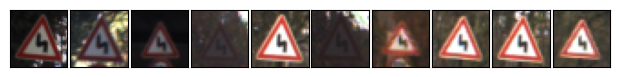

-------------------------------------------------------------------------------------

Class 22: Bumpy road                                         330 samples


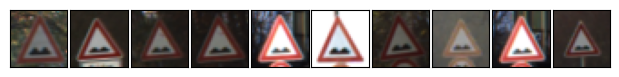

-------------------------------------------------------------------------------------

Class 23: Slippery road                                      450 samples


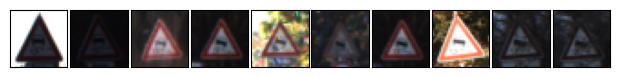

-------------------------------------------------------------------------------------

Class 24: Road narrows on the right                          240 samples


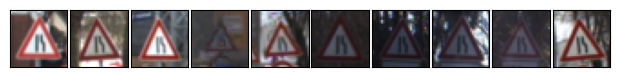

-------------------------------------------------------------------------------------

Class 25: Road work                                          1350 samples


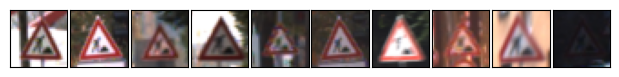

-------------------------------------------------------------------------------------

Class 26: Traffic signals                                    540 samples


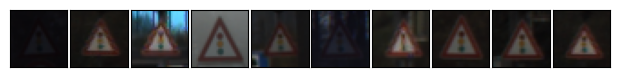

-------------------------------------------------------------------------------------

Class 27: Pedestrians                                        210 samples


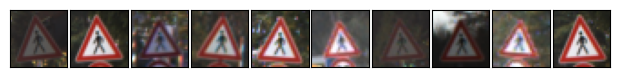

-------------------------------------------------------------------------------------

Class 28: Children crossing                                  480 samples


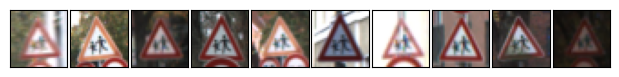

-------------------------------------------------------------------------------------

Class 29: Bicycles crossing                                  240 samples


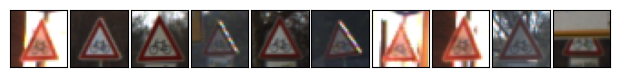

-------------------------------------------------------------------------------------

Class 30: Beware of ice/snow                                 390 samples


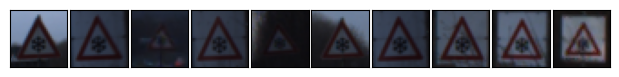

-------------------------------------------------------------------------------------

Class 31: Wild animals crossing                              690 samples


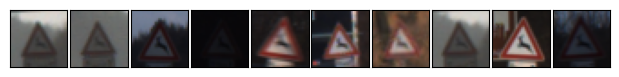

-------------------------------------------------------------------------------------

Class 32: End of all speed and passing limits                210 samples


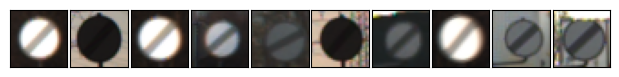

-------------------------------------------------------------------------------------

Class 33: Turn right ahead                                   599 samples


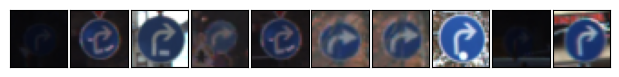

-------------------------------------------------------------------------------------

Class 34: Turn left ahead                                    360 samples


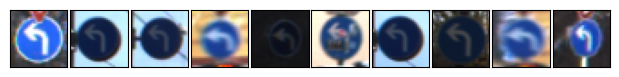

-------------------------------------------------------------------------------------

Class 35: Ahead only                                         1080 samples


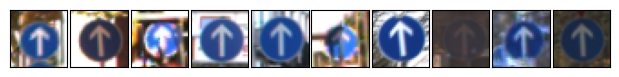

-------------------------------------------------------------------------------------

Class 36: Go straight or right                               330 samples


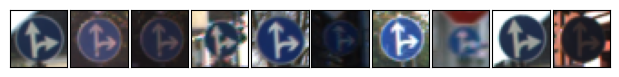

-------------------------------------------------------------------------------------

Class 37: Go straight or left                                180 samples


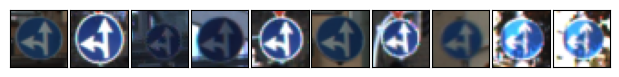

-------------------------------------------------------------------------------------

Class 38: Keep right                                         1860 samples


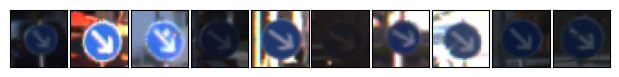

-------------------------------------------------------------------------------------

Class 39: Keep left                                          270 samples


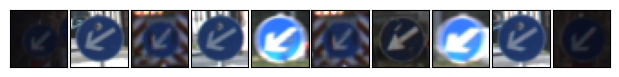

-------------------------------------------------------------------------------------

Class 40: Roundabout mandatory                               300 samples


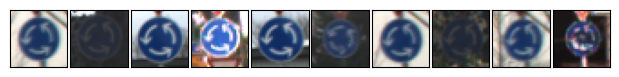

-------------------------------------------------------------------------------------

Class 41: End of no passing                                  210 samples


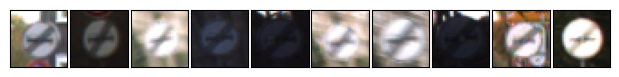

-------------------------------------------------------------------------------------

Class 42: End of no passing by vehicles over 3.5 metric tons 210 samples


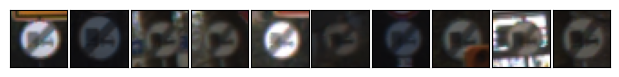

-------------------------------------------------------------------------------------



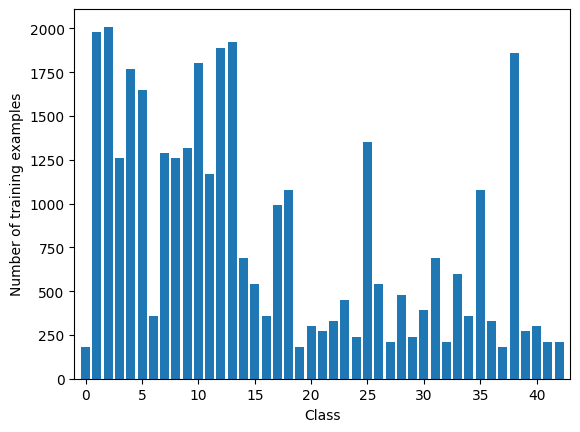

In [4]:
import random

col_width = max(len(name) for name in signnames)
for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print('Class %i: %-*s %s samples' % (c, col_width, signnames[c], c_count))
    fig = pyplot.figure(figsize=(6, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    pyplot.show()
    print('-------------------------------------------------------------------------------------\n')

pyplot.bar(np.arange(43), class_counts, align='center')
pyplot.xlabel('Class')
pyplot.ylabel('Number of training examples')
pyplot.xlim([-1, 43])
pyplot.show()

Ten fragment kodu Pythona jest używany do wyświetlania przykładowych obrazów dla każdej klasy znaków drogowych oraz do wygenerowania histogramu pokazującego liczbę przykładów treningowych dla każdej klasy.

Na początku, dla każdej klasy znaków drogowych (reprezentowanej przez `c`), kod wydrukuje nazwę klasy i liczbę przykładów w tej klasie. Następnie tworzy wykres, na którym wyświetla 10 losowo wybranych obrazów z tej klasy. Wybór losowych obrazów jest realizowany za pomocą funkcji `random.sample`, która losuje unikalne elementy z określonego zakresu.

Po wygenerowaniu wykresu dla każdej klasy, kod tworzy histogram za pomocą funkcji `pyplot.bar`. Na osi x histogramu znajdują się klasy, a na osi y - liczba przykładów treningowych dla każdej klasy. Oznacza to, że każdy słupek na wykresie reprezentuje jedną klasę, a wysokość słupka pokazuje, ile przykładów treningowych jest dostępnych dla tej klasy.

Warto zauważyć, że klasa `zip` jest używana do jednoczesnego iterowania przez trzy listy (`sign_classes`, `class_indices`, `class_counts`). Klasa `range` jest używana do tworzenia sekwencji liczb, które są używane jako indeksy do wybierania losowych obrazów oraz do określania zakresu osi x na histogramie.

In [5]:
import sys
import time

def get_time_hhmmss(start=None):
    """
    Calculates time since 'start' and formats as a string.
    """
    if start is None:
        return time.strftime("%Y/%m/%d %H:%M:%S")
    end = time.time()
    m, s = divmod(end - start, 60)
    h, m = divmod(m, 60)
    time_str = "%02d:%02d:%02d" % (h, m, s)
    return time_str

def print_progress(iteration, total):
    """
    Call in a loop to create terminal progress bar

    Parameters:
    -----------
        iteration: current iteration (Int)
        total: total iterations (Int)
    """
    str_format = "{0:.0f}"
    percents = str_format.format(100 * (iteration / float(total)))
    filled_length = int(round(100 * iteration / float(total)))
    bar = '█' * filled_length + '-' * (100 - filled_length)

    sys.stdout.write('\r |%s| %s%%' % (bar, percents)),

    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()

Ten fragment kodu Pythona zawiera dwie funkcje pomocnicze: `get_time_hhmmss` i `print_progress`. 

Funkcja `get_time_hhmmss` jest używana do obliczania czasu, który upłynął od momentu `start` do bieżącego momentu. Jeśli `start` nie jest podany, funkcja zwraca bieżący czas systemowy. W przeciwnym razie, oblicza różnicę między bieżącym czasem a `start`, a następnie formatuje tę różnicę na format godzin, minut i sekund (HH:MM:SS).

Funkcja `print_progress` jest używana do wyświetlania paska postępu w terminalu. Przyjmuje dwa argumenty: `iteration` (bieżąca iteracja) i `total` (łączna liczba iteracji). Na podstawie tych dwóch wartości oblicza procent ukończenia i długość wypełnionego paska. Następnie, wyświetla pasek postępu i procent ukończenia. Jeśli bieżąca iteracja jest równa łącznej liczbie iteracji, dodaje nową linię na końcu, aby oddzielić bieżący pasek postępu od następnego wydruku w terminalu.

Warto zauważyć, że funkcja `sys.stdout.write` jest używana do wydruku w terminalu, a `sys.stdout.flush` jest używane do opróżnienia bufora wyjścia, co gwarantuje, że wszystkie dane są natychmiast wyświetlane.

In [6]:
from sklearn.utils import shuffle
from skimage import exposure
import warnings

num_classes = 43

def preprocess_dataset(X, y = None):
    """
    Performs feature scaling, one-hot encoding of labels and shuffles the data if labels are provided.
    Assumes original dataset is sorted by labels.

    Parameters:
    -----------
        X: Dataset array
        y: Labels array
    Returns:
    --------
        A tuple of X and y.
    """
    print("Preprocessing dataset with {} examples".format(X.shape[0]))
    # Convert to grayscale, e.g. single Y channel
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    # Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)

    for i in range(X.shape[0]):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            X[i] = exposure.equalize_adapthist(X[i])
        print_progress(i + 1, X.shape[0])

    if y is not None:
        # Convert to one-hot encoding. Convert back with `y = y.nonzero()[1]`
        y = np.eye(num_classes)[y]
        # Shuffle the data
        X, y = shuffle(X, y)

    # Add a single grayscale channel
    X = X.reshape(X.shape + (1,))
    return X, y

def class_name(one_hot):
    return signnames[one_hot.nonzero()[0][0]]

def load_and_process_data(pickled_data_file):
    """
    Loads and preprocess pickled training and test data. 
    Parameters:
    -----------
        pickled_data_file: file name (str)

    Returns:
    --------
        A tuple of X and y containing training and test data.
    """
    X, y = load_pickled_data(pickled_data_file, columns = ['features', 'labels'])
    X, y = preprocess_dataset(X, y)
    return X, y

ModuleNotFoundError: No module named 'sklearn'

Ten fragment kodu Pythona zawiera dwie funkcje: `preprocess_dataset` i `load_and_process_data`.

Funkcja `preprocess_dataset` przyjmuje dwa argumenty: `X` (zbiór danych) i `y` (etykiety). Na początku, konwertuje obrazy na skale szarości, a następnie skaluje cechy do zakresu [0, 1]. Następnie, dla każdego obrazu w zbiorze danych, stosuje adaptacyjne wyrównanie histogramu. Jeśli etykiety są dostarczone, funkcja konwertuje je na kodowanie one-hot i tasuje dane. Na koniec, dodaje pojedynczy kanał skali szarości do obrazów.

Funkcja `load_and_process_data` przyjmuje jeden argument: `pickled_data_file` (nazwa pliku z danymi). Funkcja ładuje dane z pliku, a następnie przetwarza je za pomocą funkcji `preprocess_dataset`.

Warto zauważyć, że funkcja `exposure.equalize_adapthist` z biblioteki `skimage` jest używana do adaptacyjnego wyrównania histogramu, co poprawia kontrast obrazów. Ponadto, funkcja `shuffle` z biblioteki `sklearn.utils` jest używana do tasowania danych, co jest ważne dla uniknięcia overfittingu podczas uczenia modelu.

Jednakże, wygląda na to, że funkcja `load_pickled_data` nie jest zdefiniowana w tym fragmencie kodu. Możliwe, że jest zdefiniowana gdzie indziej w Twoim projekcie. Ta funkcja prawdopodobnie ładuje dane z pliku pickle i zwraca je jako tablice numpy.

In [ ]:
from nolearn.lasagne import BatchIterator
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform
import random

class AugmentedSignsBatchIterator(BatchIterator):
    """
    Iterates over dataset in batches.
    Allows images augmentation by randomly ratoating, applying projection, adjusting gamma and blurring, adding noise etc.
    """

    def __init__(self, batch_size, shuffle = False, seed = 42,  p = .5, intensity = .5):
        """
        Initializes an instance with usual iterating settings, as well as data augmentation coverage
        and augmentation intensity.

        Parameters:
        -----------
            batch_size: Size of the batch to return
            shuffle: Whether to shuffle the data
            seed: Random seed to use for rng
            p: Probability of augmenting a single example
            intensity: Intensity of augmentation
        Returns:
        --------
            New batch iterator instance
        """
        super(AugmentedSignsBatchIterator, self).__init__(batch_size, shuffle, seed)
        self.p = p
        self.intensity = intensity

    def transform(self, Xb, yb):
        """
        Applies a pipeline of randomised transformations for data augmentation purposes.
        """
        Xb, yb = super(AugmentedSignsBatchIterator, self).transform(
            Xb if yb is None else Xb.copy(),
            yb
        )

        if yb is not None:
            batch_size = Xb.shape[0]
            image_size = Xb.shape[1]

            Xb = self.rotate(Xb, batch_size)
            Xb = self.apply_projection_transform(Xb, batch_size, image_size)

        return Xb, yb
    
    def rotate(self, Xb, batch_size):
        """
        Applies random rotation in a defined degrees range to a random subset of images.
        Benge itself is subject to scaling depending on augmentation intensity.
        """
        for i in np.random.choice(batch_size, int(batch_size * self.p), replace=False):
            delta = 30. * self.intensity
            Xb[i] = rotate(Xb[i], random.uniform(-delta, delta), mode = 'edge')
        return Xb
    
    def apply_projection_transform(self, Xb, batch_size, image_size):
        """
        Applies projection transform to a random subset of images. Projection margins are randomised in a range
        depending on the size of the image. Range itself is subject to scaling depending on augmentation intensity.
        """
        d = image_size * 0.3 * self.intensity
        for i in np.random.choice(batch_size, int(batch_size * self.p), replace=False):
            tl_top = random.uniform(-d, d)     # Top left corner, top margin
            tl_left = random.uniform(-d, d)    # Top left corner, left margin
            bl_bottom = random.uniform(-d, d)  # Bottom left corner, bottom margin
            bl_left = random.uniform(-d, d)   # Bottom left corner, left margin
            tr_top = random.uniform(-d, d)    # Top right corner, top margin
            tr_right = random.uniform(-d, d) # Top right corner, right margin
            br_bottom = random.uniform(-d, d) # Bottom right corner, bottom margin
            br_right = random.uniform(-d, d) # Bottom right corner, right margin

            transform = ProjectiveTransform()
            transform.estimate(np.array((
                    (tl_left, tl_top),
                    (bl_left, image_size - bl_bottom),
                    (image_size - br_right, image_size - br_bottom),
                    (image_size - tr_right, tr_top)
                )), np.array((
                    (0, 0),
                    (0, image_size),
                    (image_size, image_size),
                    (image_size, 0)
                )))
            Xb[i] = warp(Xb[i], transform, output_shape=(image_size, image_size), order = 1, mode = 'edge')
        return Xb

Ten fragment kodu definiuje klasę `AugmentedSignsBatchIterator`, która dziedziczy po klasie `BatchIterator` z biblioteki `nolearn.lasagne`. Klasa ta jest używana do iterowania po zbiorze danych w partiach (ang. batches) i umożliwia augmentację obrazów poprzez losowe obracanie, stosowanie transformacji projekcyjnej i innych technik.

Konstruktor klasy (`__init__`) przyjmuje kilka argumentów, w tym `batch_size` (rozmiar partii), `shuffle` (czy dane mają być tasowane), `seed` (ziarno dla generatora liczb losowych), `p` (prawdopodobieństwo augmentacji pojedynczego przykładu) i `intensity` (intensywność augmentacji). W konstruktorze inicjalizowane są te wartości oraz wywoływany jest konstruktor klasy nadrzędnej.

Metoda `transform` jest używana do zastosowania losowych transformacji dla celów augmentacji danych. Najpierw wywoływana jest metoda `transform` klasy nadrzędnej, a następnie, jeśli etykiety nie są puste, na danych wykonywane są dodatkowe transformacje: obrót i transformacja projekcyjna.

Metoda `rotate` losowo obraca podzbiór obrazów. Stopień obrotu jest losowy i zależy od intensywności augmentacji.

Metoda `apply_projection_transform` stosuje transformację projekcyjną do losowego podzbioru obrazów. Marginesy projekcji są losowane w zakresie zależnym od rozmiaru obrazu, a sam zakres jest skalowany w zależności od intensywności augmentacji.

Wszystkie te metody służą do zwiększenia różnorodności danych treningowych, co pomaga w zapobieganiu overfittingu i zwiększa zdolność modelu do generalizacji na nowych danych.

In [ ]:
X_train, y_train = load_pickled_data('data/train.pickle', columns = ['features', 'labels'])
X_train = X_train / 255

batch_iterator = AugmentedSignsBatchIterator(batch_size=5, p=1.0, intensity=.75)
for x_batch, y_batch in batch_iterator(X_train, y_train):
    for i in range(5):
        # plot 2 images
        fig = pyplot.figure(figsize=(3, 1))
        axis = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
        axis.imshow(X_train[i])
        axis = fig.add_subplot(1, 2, 2, x_ticks=[], y_ticks=[])
        axis.imshow(x_batch[i])
        pyplot.show()
    break

Ten fragment kodu jest częścią skryptu do rozpoznawania znaków drogowych. Najpierw ładuje dane treningowe z pliku 'train.pickle', a następnie normalizuje je, dzieląc przez 255, aby wartości pikseli mieściły się w zakresie od 0 do 1.

Następnie tworzy instancję klasy `AugmentedSignsBatchIterator` z rozmiarem partii równym 5, prawdopodobieństwem augmentacji równym 1.0 i intensywnością augmentacji równą 0.75. Ta klasa jest używana do iterowania po danych treningowych w partiach i jednoczesnego losowego augmentowania obrazów (np. poprzez obrót lub transformację projekcyjną), co pomaga zwiększyć różnorodność danych treningowych i zapobiegać overfittingowi.

Pętla `for` iteruje przez dane treningowe w partiach. Dla każdej partii, wyświetla dwa obrazy dla każdego z pięciu przykładów w partii: oryginalny obraz i obraz po augmentacji. Obrazy są wyświetlane obok siebie dla porównania. Pętla `for` jest przerwana po pierwszej iteracji, więc tylko pierwsza partia jest wyświetlana.

Warto zauważyć, że w tym kodzie używane są biblioteki `matplotlib` do wyświetlania obrazów (poprzez obiekt `pyplot`) oraz `numpy` do manipulacji danymi.

In [ ]:
def flip_extend(X, y):
    """
    Extends existing images dataset by fliping images of some classes. As some images would still belong to same class after flipping we extend
    such classes with flipped images. Images of other would toggle between two classes when flipped, so for those we extend existing datasets
    as well.

    Parameters:
    -----------
        X: ndarray
            Dataset array containing feature examples
        y: ndarray, optional, defaults to None
            Dataset labels in index form

    Returns:
    --------
        A tuple of X and y.
    """

    # Classes of signs that, when flipped horizontally, should still be classified as the same class
    self_flippable_horizontally = ([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
    # Classes of signs that, when flipped vertically, should still be classified as the same class
    self_flippable_vertically = np.array([1, 5, 12, 15, 17])
    # Classes of signs that, when flipped horizontally and then vertically, should still be classified as the same class
    self_flippable_both = np.array([32, 40])
    # Classes of signs that, when flipped horizontally, would still be meaningful, but should be classified as some other class
    cross_flippable = np.array([
        [19, 20], [33, 34], [36, 37], [38, 39], [20, 19], [34, 33], [37, 36], [39, 38]
    ])
    num_classes = 43

    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype = X.dtype)
    y_extended = np.empty([0], dtype = y.dtype)
    
    for c in range(num_classes):
        # First copy existing dataset for this class
        X_extended = np.append(X_extended, X[y == c], axis = 0)
        # If we can flip images if this class horizontally and they would still belong to said class..
        if c in self_flippable_horizontally:
            # .. copy their flipped versions into extended array
            X_extended = np.append(X_extended, X[y == t][:, :, ::-1, :], axis = 0)
        # If we can flip images of this class horizontally and they would belon to other class..
        if c in cross_flippable[:, 0]:
            # .. copy flipped images of that other class to the extended array
            flip_class = cross_flippable[cross_flippable[:, 0] ==c][0][1]
            X_extended = np.append(X_extended, X[y == flip_class][:, :, ::-1, :], axis=0)
        # Fill labels for added images set to current class
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))

        # If we can flip images of this class vertically and they would still belong to said class..
        if c in self_flippable_vertically:
            # .. copy their flipped versions into extended array
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, :, :]], axis = 0)
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        # If we can flip images of this class horizontally and vertically and the would still belong to said class..
        if c in self_flippable_both:
            # .. copy their flipped versions into extended array
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, :], axis = 0)
        # Fill labels for added images set to current class
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int)
    return X_extended, y_extended

def extend_balancing_classes(X, y, aug_intensity = 0.5, counts = None):
    """
    Extends dataset by duplicating existings images while applying data augmentation pipeline.
    Number of generated examples for each class may be provided in 'counts'.

    Parameters:
    -----------
        X: ndarray
            Dataset array containing feature examples
        x: ndarray, optional, default to 'None'
            Dataset labels in index form
        aug_intensity: 
            Intensity of augmentation, must be in [0. 1] range.
        couts: 
            Number of elements for each class.

    Returns:
    --------
        A tuple of X and y.
    """

    num_classes = 43
    _, class_counts = np.unique(y, return_counts = True)
    max_c = max(class_counts)
    total = max_c * num_classes if counts is None else np.sum(counts)

    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype = np.float32)
    y_extended = np.empty([0, dtype = y.dtype])
    print('Extending dataset using augmented data (intensity = {}):'.format(aug_intensity))

    for c, c_count in zip(range(num_classes), class_counts):
        # How many examples should there be aventually for this class
        max_c = max_c if counts is None else counts[c]
        # First copy existing data for this class
        X_source = (X[y == c] / 255.).astype(np.float32)
        y_source = y[y == c]
        X_extended = np.append(X_extended, X_source, axis = 0)
        for i in range((max_c // c_count) - 1):
            batch_iterator = AugmentedSignsBatchIterator(batch_size = X_source.shape[0], p = 1.0, intensity = aug_intensity)
            for x_batch, _ in batch_iterator(X_source, y_source):
                X_extended = np.append(X_extended, x_batch, axis=0)
                print_progress(X_extended.shape[0], total)
        batch_iterator = AugmentedSignsBatchIterator(batch_size = max_c % c_count, p = 1.0, intensity = aug_intensity)
        for x_batch, _ in batch_iterator(X_source, y_source):
            X_extended = np.append(X_extended, x_batch, axis = 0)
            print_progress(X_extended.shape[0], total)
            break
        # Fill labels for added images set to current class
        added = X_extended.shape[0] - y_extended.shape[0]
        y_extended = np.append(y_extended, np.full((added), c, dtype = int))
    return ((X_extended * 255.).astype(np.uint8), y_extended)